In [1]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvement
# Website 
# Depoly

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
## Non null values - v1 , v2  
## we can remove cells 2,3,4 (many missing values)

In [9]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'target','v2':'input-data'} , inplace=True)

In [12]:
df.head()

,target,input-data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.sample(5)

,target,input-data
4215,ham,Er mw im filled tuth is aight
2987,ham,Do you still have the grinder?
194,ham,How are you doing? Hope you've settled in for ...
2787,ham,"Forgot it takes me 3 years to shower, sorry. W..."
4668,ham,"When I was born, GOD said, \Oh No! Another IDI..."


In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder
print("scikit-learn is working!")

scikit-learn is working!


In [15]:
encoder = LabelEncoder()

In [16]:
df["target"] = encoder.fit_transform(df.target)

In [17]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# check for missing values
df.isnull().sum()

target        0
input-data    0
dtype: int64

In [19]:
#check for duplicates
df.duplicated().sum()

np.int64(403)

In [20]:
# drop duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5169 non-null   int64 
 1   input-data  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# EDA (Explorary data analysis)

In [24]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [26]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7ff2b3043b00>,
 [Text(-1.014499732282844, 0.4251944181172162, 'Notspem'),
  Text(1.0144998708287172, -0.42519408755122207, 'spem')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

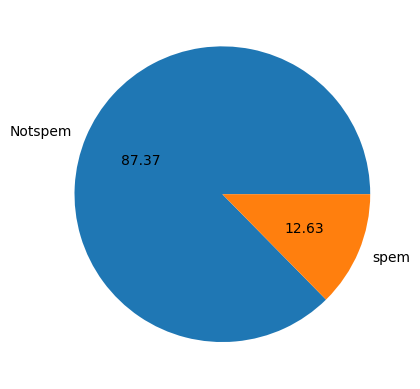

In [27]:
plt.pie(df['target'].value_counts(), labels=['Notspem','spem'],autopct="%0.2f")

In [28]:
import nltk
import re

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ashok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['num_char'] = df['input-data'].apply(len)

In [31]:
df.head()

,target,input-data,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
df['num_words'] = df['input-data'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

# This is a method to remove all the special characters from the text and split the text into words

In [33]:
import spacy
nlp = spacy.load("en_core_web_sm")
df['num_words'] = df['input-data'].apply(lambda x: len([token.text for token in nlp(x)]))
df.head()

,target,input-data,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")
# df['sent_words'] = df['input-data'].apply(lambda x: len([token for token in nlp(x) if not token.is_space]))
def count_tokens(text):
    doc = nlp(text)

    return  len(list(doc.sents))

df['num_sent'] = df['input-data'].apply(count_tokens)

df.head()



,target,input-data,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.100987
std,58.236293,13.175170,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,27.000000


In [36]:
df[df["target"]==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [37]:
#spem
df[df["target"]==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

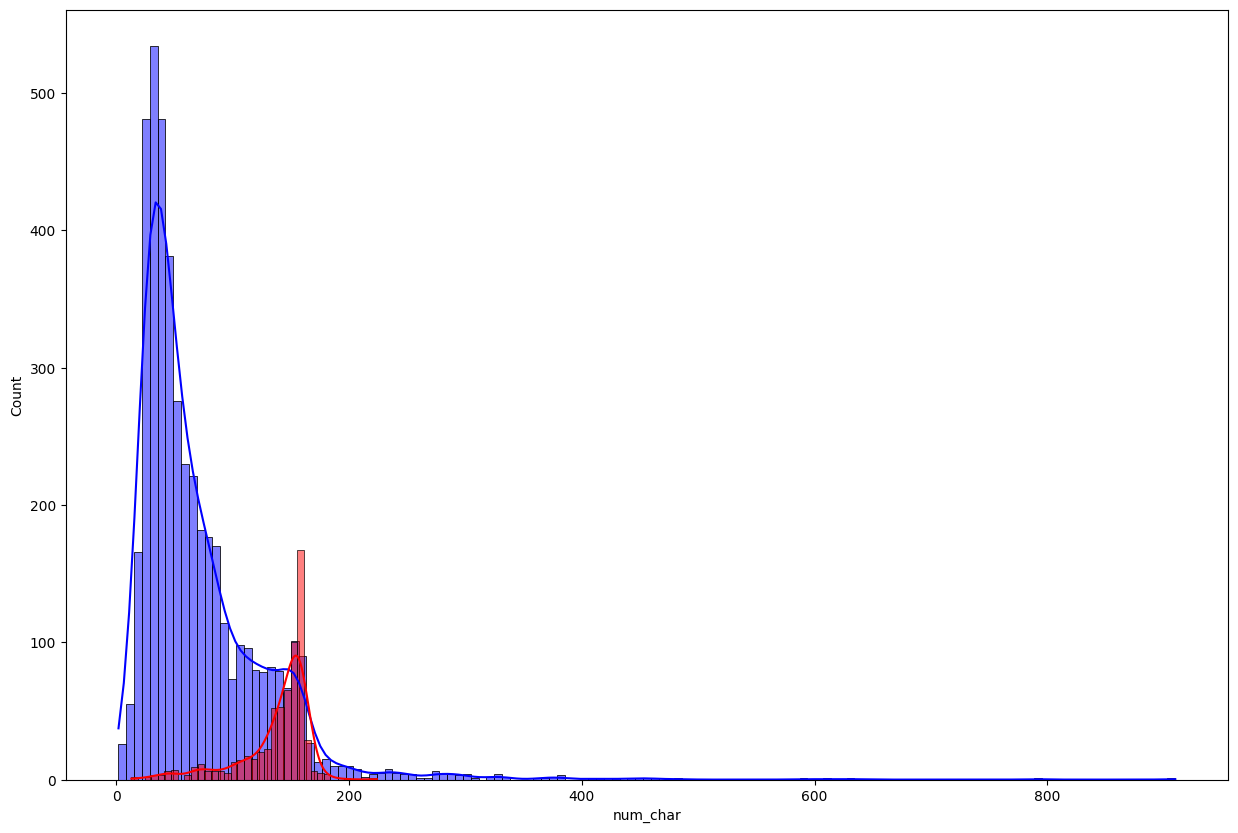

In [39]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_char'],color='blue',label='Not Spam',kde=True)
sns.histplot(df[df['target']==1]['num_char'],color='red',label='Spam',kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

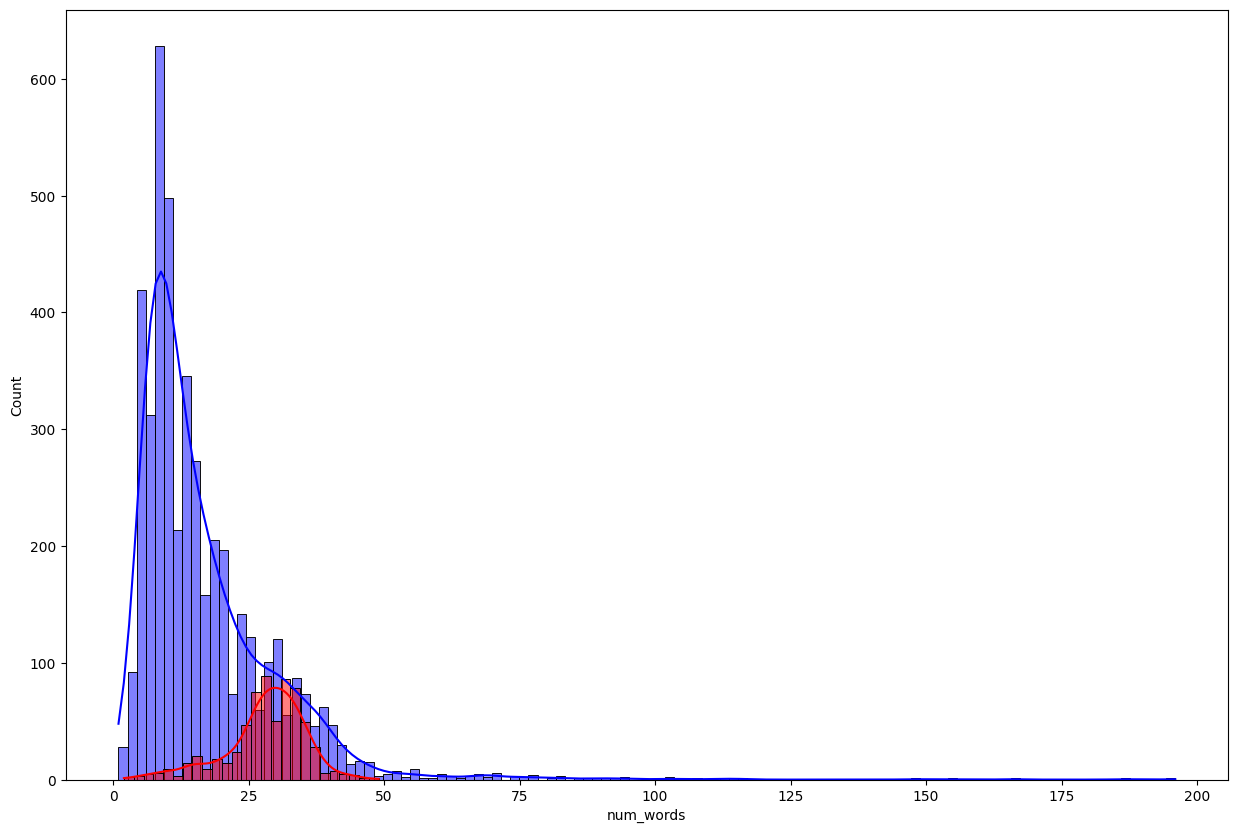

In [40]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_words'],color='blue',label='Not Spam',kde=True)
sns.histplot(df[df['target']==1]['num_words'],color='red',label='Spam',kde=True)

<Axes: xlabel='num_sent', ylabel='Count'>

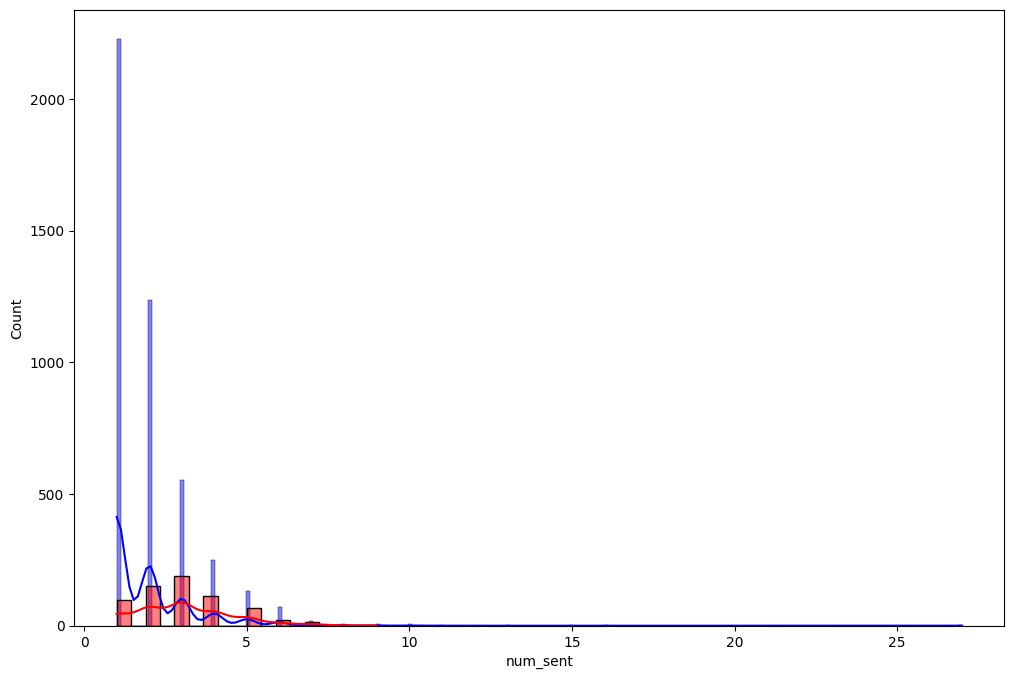

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sent'],color='blue',label='Not Spam',kde=True)
sns.histplot(df[df['target']==1]['num_sent'],color='red',label='Spam',kde=True)

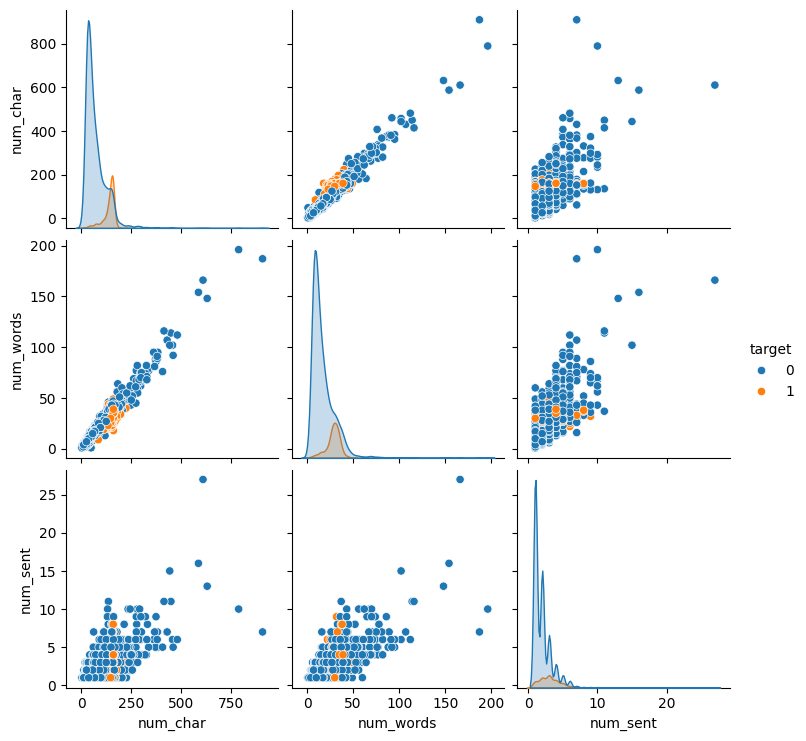

In [42]:
sns.pairplot(df[['num_char','num_words','num_sent','target']],hue='target')

In [43]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5169 non-null   int64 
 1   input-data  5169 non-null   object
 2   num_char    5169 non-null   int64 
 3   num_words   5169 non-null   int64 
 4   num_sent    5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


<Axes: >

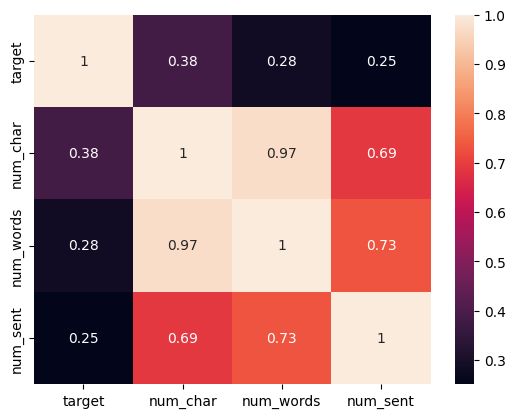

In [45]:
df_int = df.select_dtypes(include=['number'])
sns.heatmap(df_int.corr(),annot=True)

## Data preprocessing

In [46]:
# lower case 
# tokenization
# remove special characters
# remove stop words
# remove punctuations
# remove numbers
# remove empty strings
# remove extra spaces
# stemming

In [47]:
df.head()

,target,input-data,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/ashok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ashok/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ashok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import spacy
import re
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words # set type
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [50]:
def transform_text(text):
    text = text.lower()  
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = [token.text for token in nlp(text)]  # Tokenize text using spaCy
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alph
    tokens = [token for token in tokens if token not in stopwords] # Remove stopwords
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmas = [lemmatizer.lemmatize(token, pos='n') for token in stemmed_tokens]
    # lemmas = list(set(lemmas))
    unique_list = []
    seen = set()

    for item in lemmas:
        if item not in seen:
            unique_list.append(item)
            seen.add(item)
    return " ".join(unique_list)
   

In [51]:
df['cleaned_text'] = df['input-data'].apply(transform_text)
df.head()

,target,input-data,num_char,num_words,num_sent,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entri wkli comp win fa cup final tkt st t...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun earli hor c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live


In [ ]:
df.to_csv('cleaned_data.csv')


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spem_wc = wc.generate(' '.join(df[df['target']==1]['cleaned_text'].str.cat(sep=" ")))

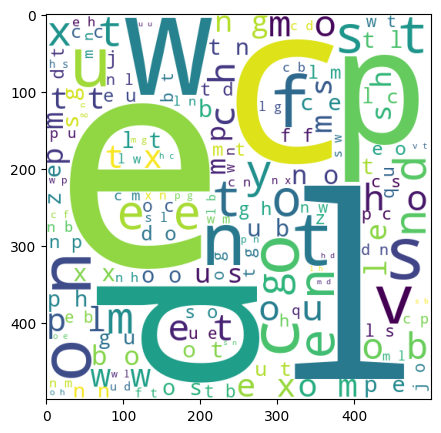

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(spem_wc)

In [ ]:
not_spem_wc = wc.generate(' '.join(df[df['target']==0]['cleaned_text'].str.cat(sep=" ")))

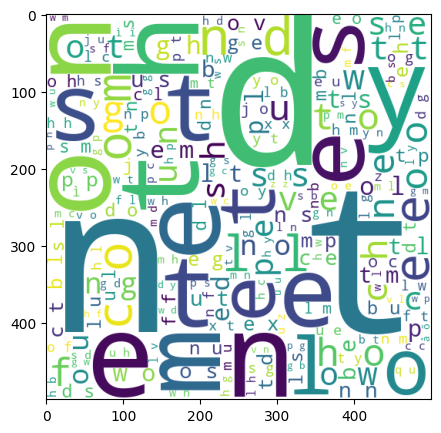

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(spem_wc)

In [52]:
df.head()

,target,input-data,num_char,num_words,num_sent,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entri wkli comp win fa cup final tkt st t...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun earli hor c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live


In [ ]:
spem_list = []
for i in df[df['target']==1]['cleaned_text'].tolist():
    for word in i.split():
        spem_list.append(word)
not_spem_list = []
for i in df[df['target']==0]['cleaned_text'].tolist():
    for word in i.split():
        not_spem_list.append(word) 

In [ ]:
print(len(spem_list),len(not_spem_list))


8013 30443


In [ ]:
from collections import Counter
counter_spem = pd.DataFrame(Counter(spem_list).most_common(30))
counter_not_spem = pd.DataFrame(Counter(not_spem_list).most_common(30))

/tmp/ipykernel_15531/4203453406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counter_spem[0],y=counter_spem[1],palette="viridis")


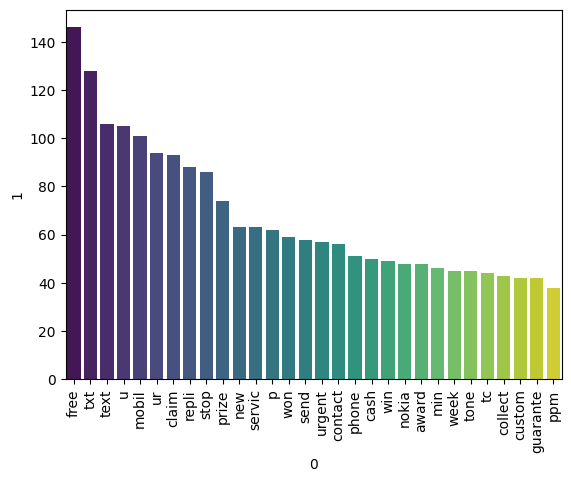

In [ ]:
sns.barplot(x=counter_spem[0],y=counter_spem[1],palette="viridis")
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_15531/2361110419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counter_not_spem[0],y=counter_not_spem[1], palette="viridis")


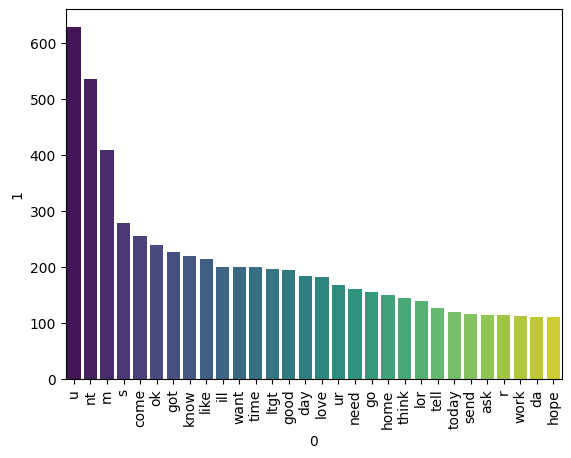

In [ ]:
sns.barplot(x=counter_not_spem[0],y=counter_not_spem[1], palette="viridis")
plt.xticks(rotation=90)
plt.show()

In [53]:
df.head()

,target,input-data,num_char,num_words,num_sent,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entri wkli comp win fa cup final tkt st t...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun earli hor c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live


## Model Building

In [88]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [89]:
# X = cv.fit_transform(df['cleaned_text']).toarray()
X = tfidf.fit_transform(cv.fit_transform(df['cleaned_text'])).toarray()

In [90]:
X.shape

(5169, 6900)

In [91]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [94]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8500967117988395
[[767 129]
 [ 26 112]]
0.46473029045643155


In [96]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [97]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.965183752417795
[[888   8]
 [ 28 110]]
0.9322033898305084


In [98]:
#  MultinomialNB with tfidf

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier

In [100]:
svc = SVC(kernel='linear' ,gamma='auto')
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
adc = AdaBoostClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
mnb = MultinomialNB()

# xgb = XGBClassifier()

In [101]:
clfs ={
    'SVC':svc,
    'LogisticRegression':lrc,
    'RandomForestClassifier':rfc,
    'DecisionTreeClassifier':dtc,
    'GradientBoostingClassifier':gbdt,
    'KNeighborsClassifier':knn,
    'AdaBoostClassifier':adc,
    'ExtraTreesClassifier':etc,
    'BaggingClassifier':bc,
    'MultinomialNB':mnb
}

In [102]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return acc,precision

In [103]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9826086956521739)

In [104]:
accuracy_scores = []
precision_scores = []


for name,clf in clfs.items():
    acc,prec = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    print(f"{name} accuracy: {acc} precision: {prec}")

SVC accuracy: 0.9738878143133463 precision: 0.9826086956521739
LogisticRegression accuracy: 0.9535783365570599 precision: 0.9411764705882353
RandomForestClassifier accuracy: 0.9700193423597679 precision: 0.9734513274336283
DecisionTreeClassifier accuracy: 0.9294003868471954 precision: 0.8494623655913979
GradientBoostingClassifier accuracy: 0.9487427466150871 precision: 0.9775280898876404
KNeighborsClassifier accuracy: 0.8994197292069632 precision: 1.0
AdaBoostClassifier accuracy: 0.9042553191489362 precision: 0.9148936170212766
ExtraTreesClassifier accuracy: 0.9738878143133463 precision: 0.9826086956521739
BaggingClassifier accuracy: 0.9632495164410058 precision: 0.8968253968253969
MultinomialNB accuracy: 0.9593810444874274 precision: 1.0


In [105]:
Performance = pd.DataFrame({'Accuracy':accuracy_scores,
'Precision':precision_scores},index=clfs.keys())

In [106]:
Performance


,Accuracy,Precision
SVC,0.973888,0.982609
LogisticRegression,0.953578,0.941176
RandomForestClassifier,0.970019,0.973451
DecisionTreeClassifier,0.929400,0.849462
GradientBoostingClassifier,0.948743,0.977528
KNeighborsClassifier,0.899420,1.000000
AdaBoostClassifier,0.904255,0.914894
ExtraTreesClassifier,0.973888,0.982609
BaggingClassifier,0.963250,0.896825
MultinomialNB,0.959381,1.000000


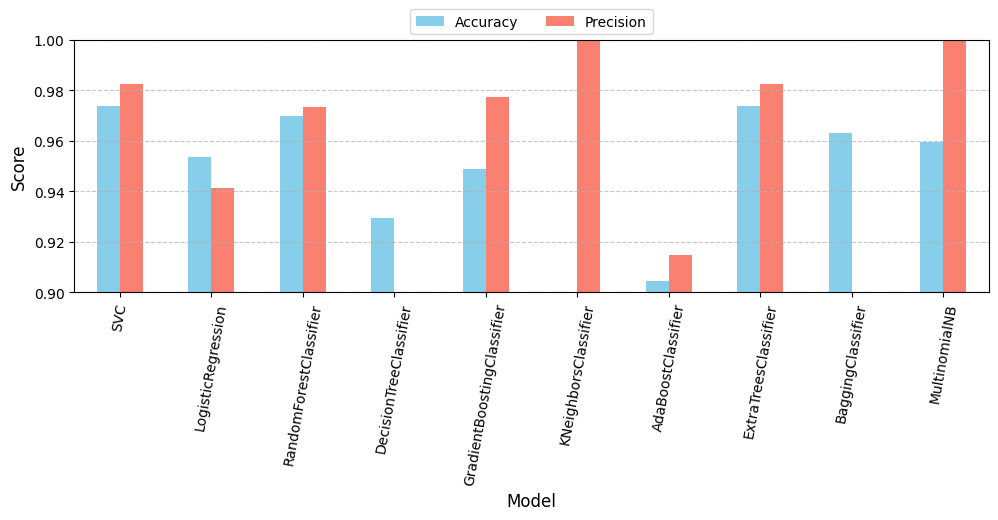

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
Performance.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'])
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=80)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.9, 1.0)
plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)  
plt.show()



In [108]:
# using this --> svm,etc,mnb

In [109]:
Performance.head(10)

,Accuracy,Precision
SVC,0.973888,0.982609
LogisticRegression,0.953578,0.941176
RandomForestClassifier,0.970019,0.973451
DecisionTreeClassifier,0.929400,0.849462
GradientBoostingClassifier,0.948743,0.977528
KNeighborsClassifier,0.899420,1.000000
AdaBoostClassifier,0.904255,0.914894
ExtraTreesClassifier,0.973888,0.982609
BaggingClassifier,0.963250,0.896825
MultinomialNB,0.959381,1.000000


In [110]:
from sklearn.ensemble import StackingClassifier

In [111]:
clf = StackingClassifier(estimators=[('SVC', svc), ('ExtraTreesClassifier', etc), ('MultinomialNB', mnb)], final_estimator=RandomForestClassifier()) #

In [112]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9825918762088974
[[894   2]
 [ 16 122]]
0.9838709677419355


In [115]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['cleaned_text'])  

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnb_model.pkl','wb'))
print("TfidfVectorizer fitted and saved successfully.")


TfidfVectorizer fitted and saved successfully.
